# Aim :
To predict delivery time using sorting time using simple linear regression model

In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\Data Science\Assignment_4\delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Data Visualisation

<Axes: xlabel='Delivery Time', ylabel='Density'>

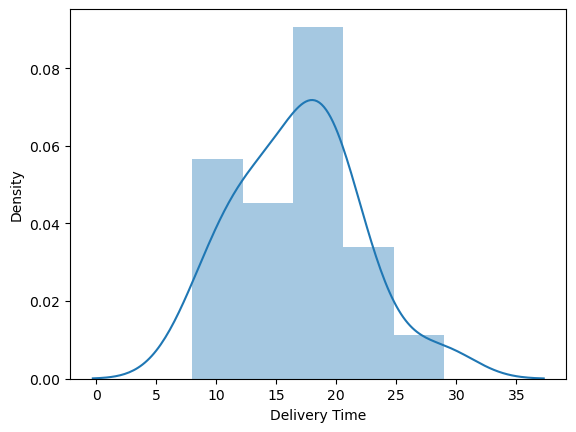

In [16]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

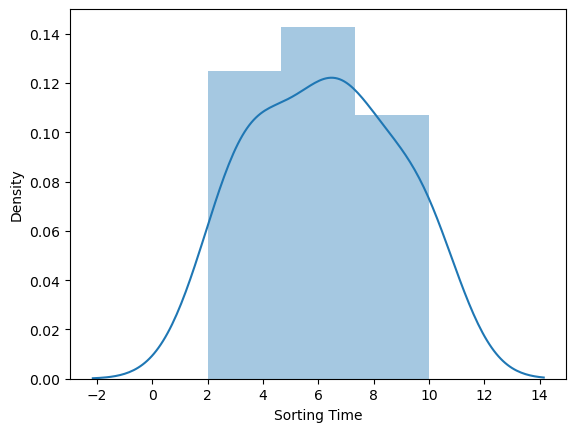

In [17]:
sns.distplot(df['Sorting Time'])

In [18]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Model Building

In [21]:
import statsmodels.formula.api as smf

In [27]:
df.rename(columns={'Delivery Time':'Delivery','Sorting Time':'Sorting'}, inplace=True)

In [29]:
model = smf.ols('Delivery~Sorting',data=df).fit()

In [37]:
c,m = model.params
c,m

(6.582733971997052, 1.6490198968312455)

# Line Equation

In [39]:
x=10 
y=m*x +c
y

23.072932940309506

# R2 Value

In [40]:
model.rsquared

0.6822714748417231

# Prediction for new data

In [44]:
newd= pd.Series([19,10,33,12])
newd=pd.DataFrame(data=newd,columns=['Sorting'])
newd

,Sorting
0,19
1,10
2,33
3,12


In [45]:
newd['Delivery']= model.predict(newd).round(3)
newd

,Sorting,Delivery
0,19,37.914
1,10,23.073
2,33,61.000
3,12,26.371


# Data Transformation

In [46]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=300

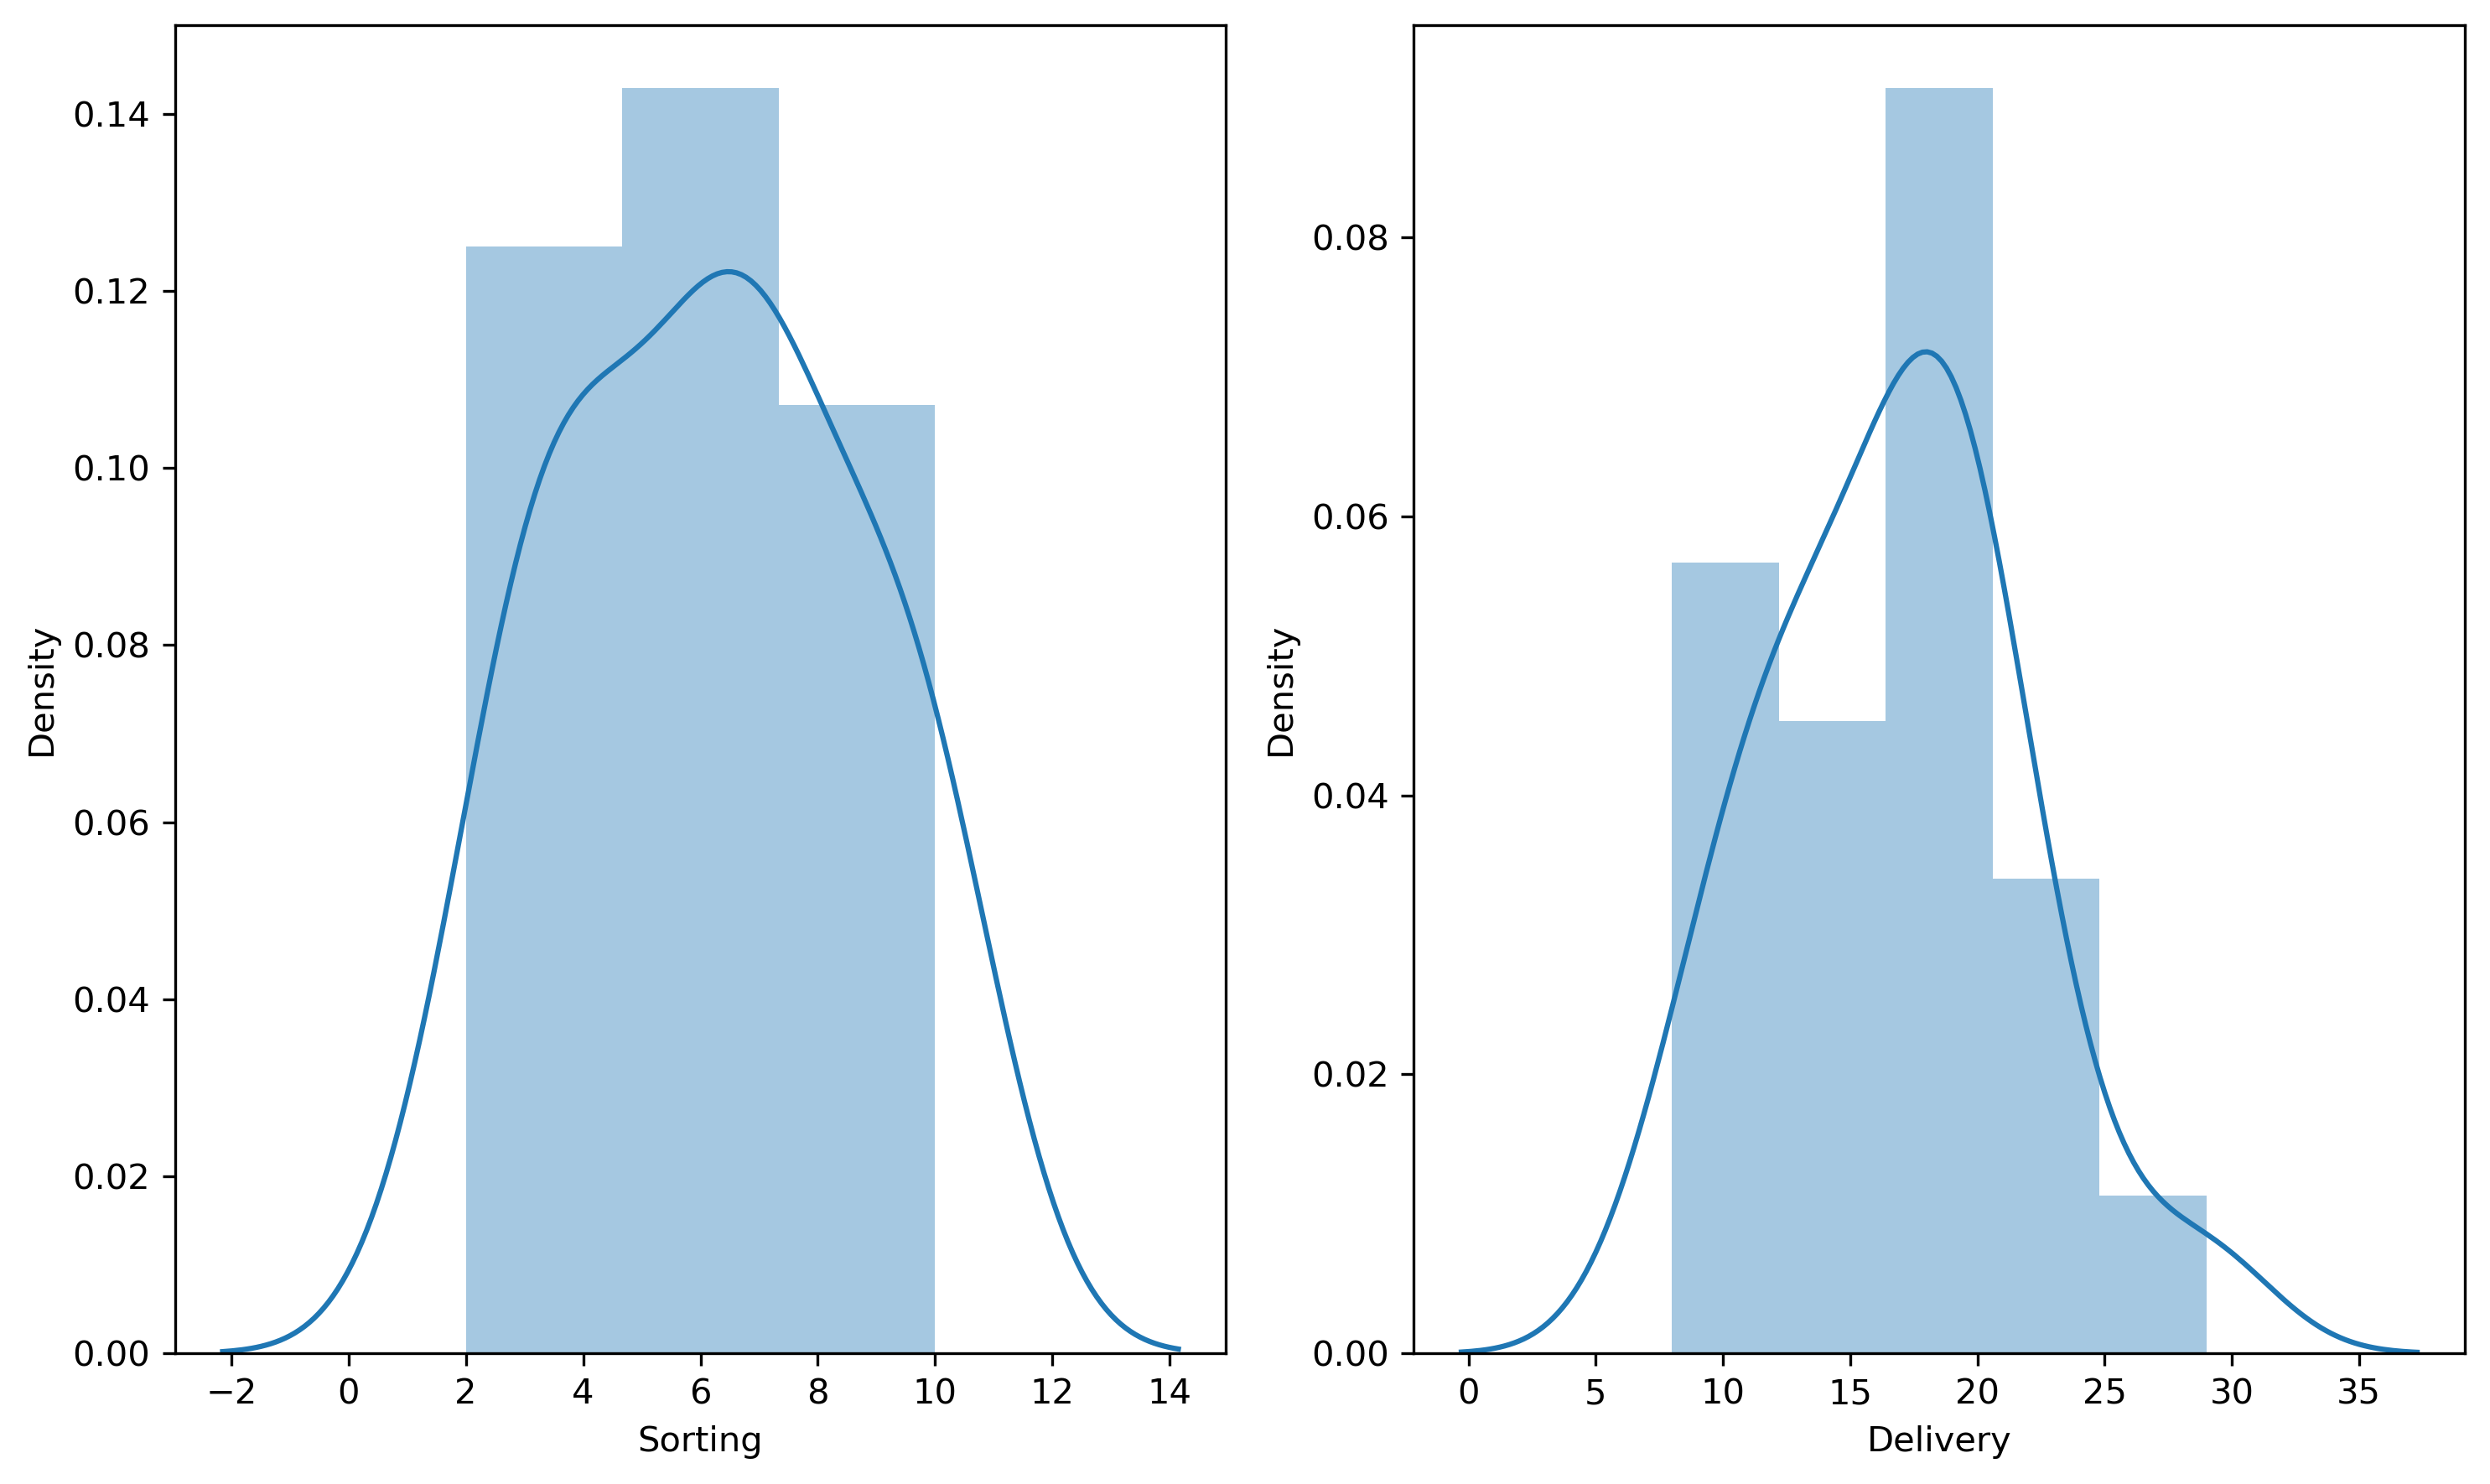

In [50]:
plt.subplot(1,2,1)
sns.distplot(df['Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['Delivery'])
plt.tight_layout()

# Log Transformation

In [51]:
df['log_sorting']= np.log(df['Sorting'])
df['log_delivery']= np.log(df['Delivery'])
df.head()

,Delivery,Sorting,log_sorting,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


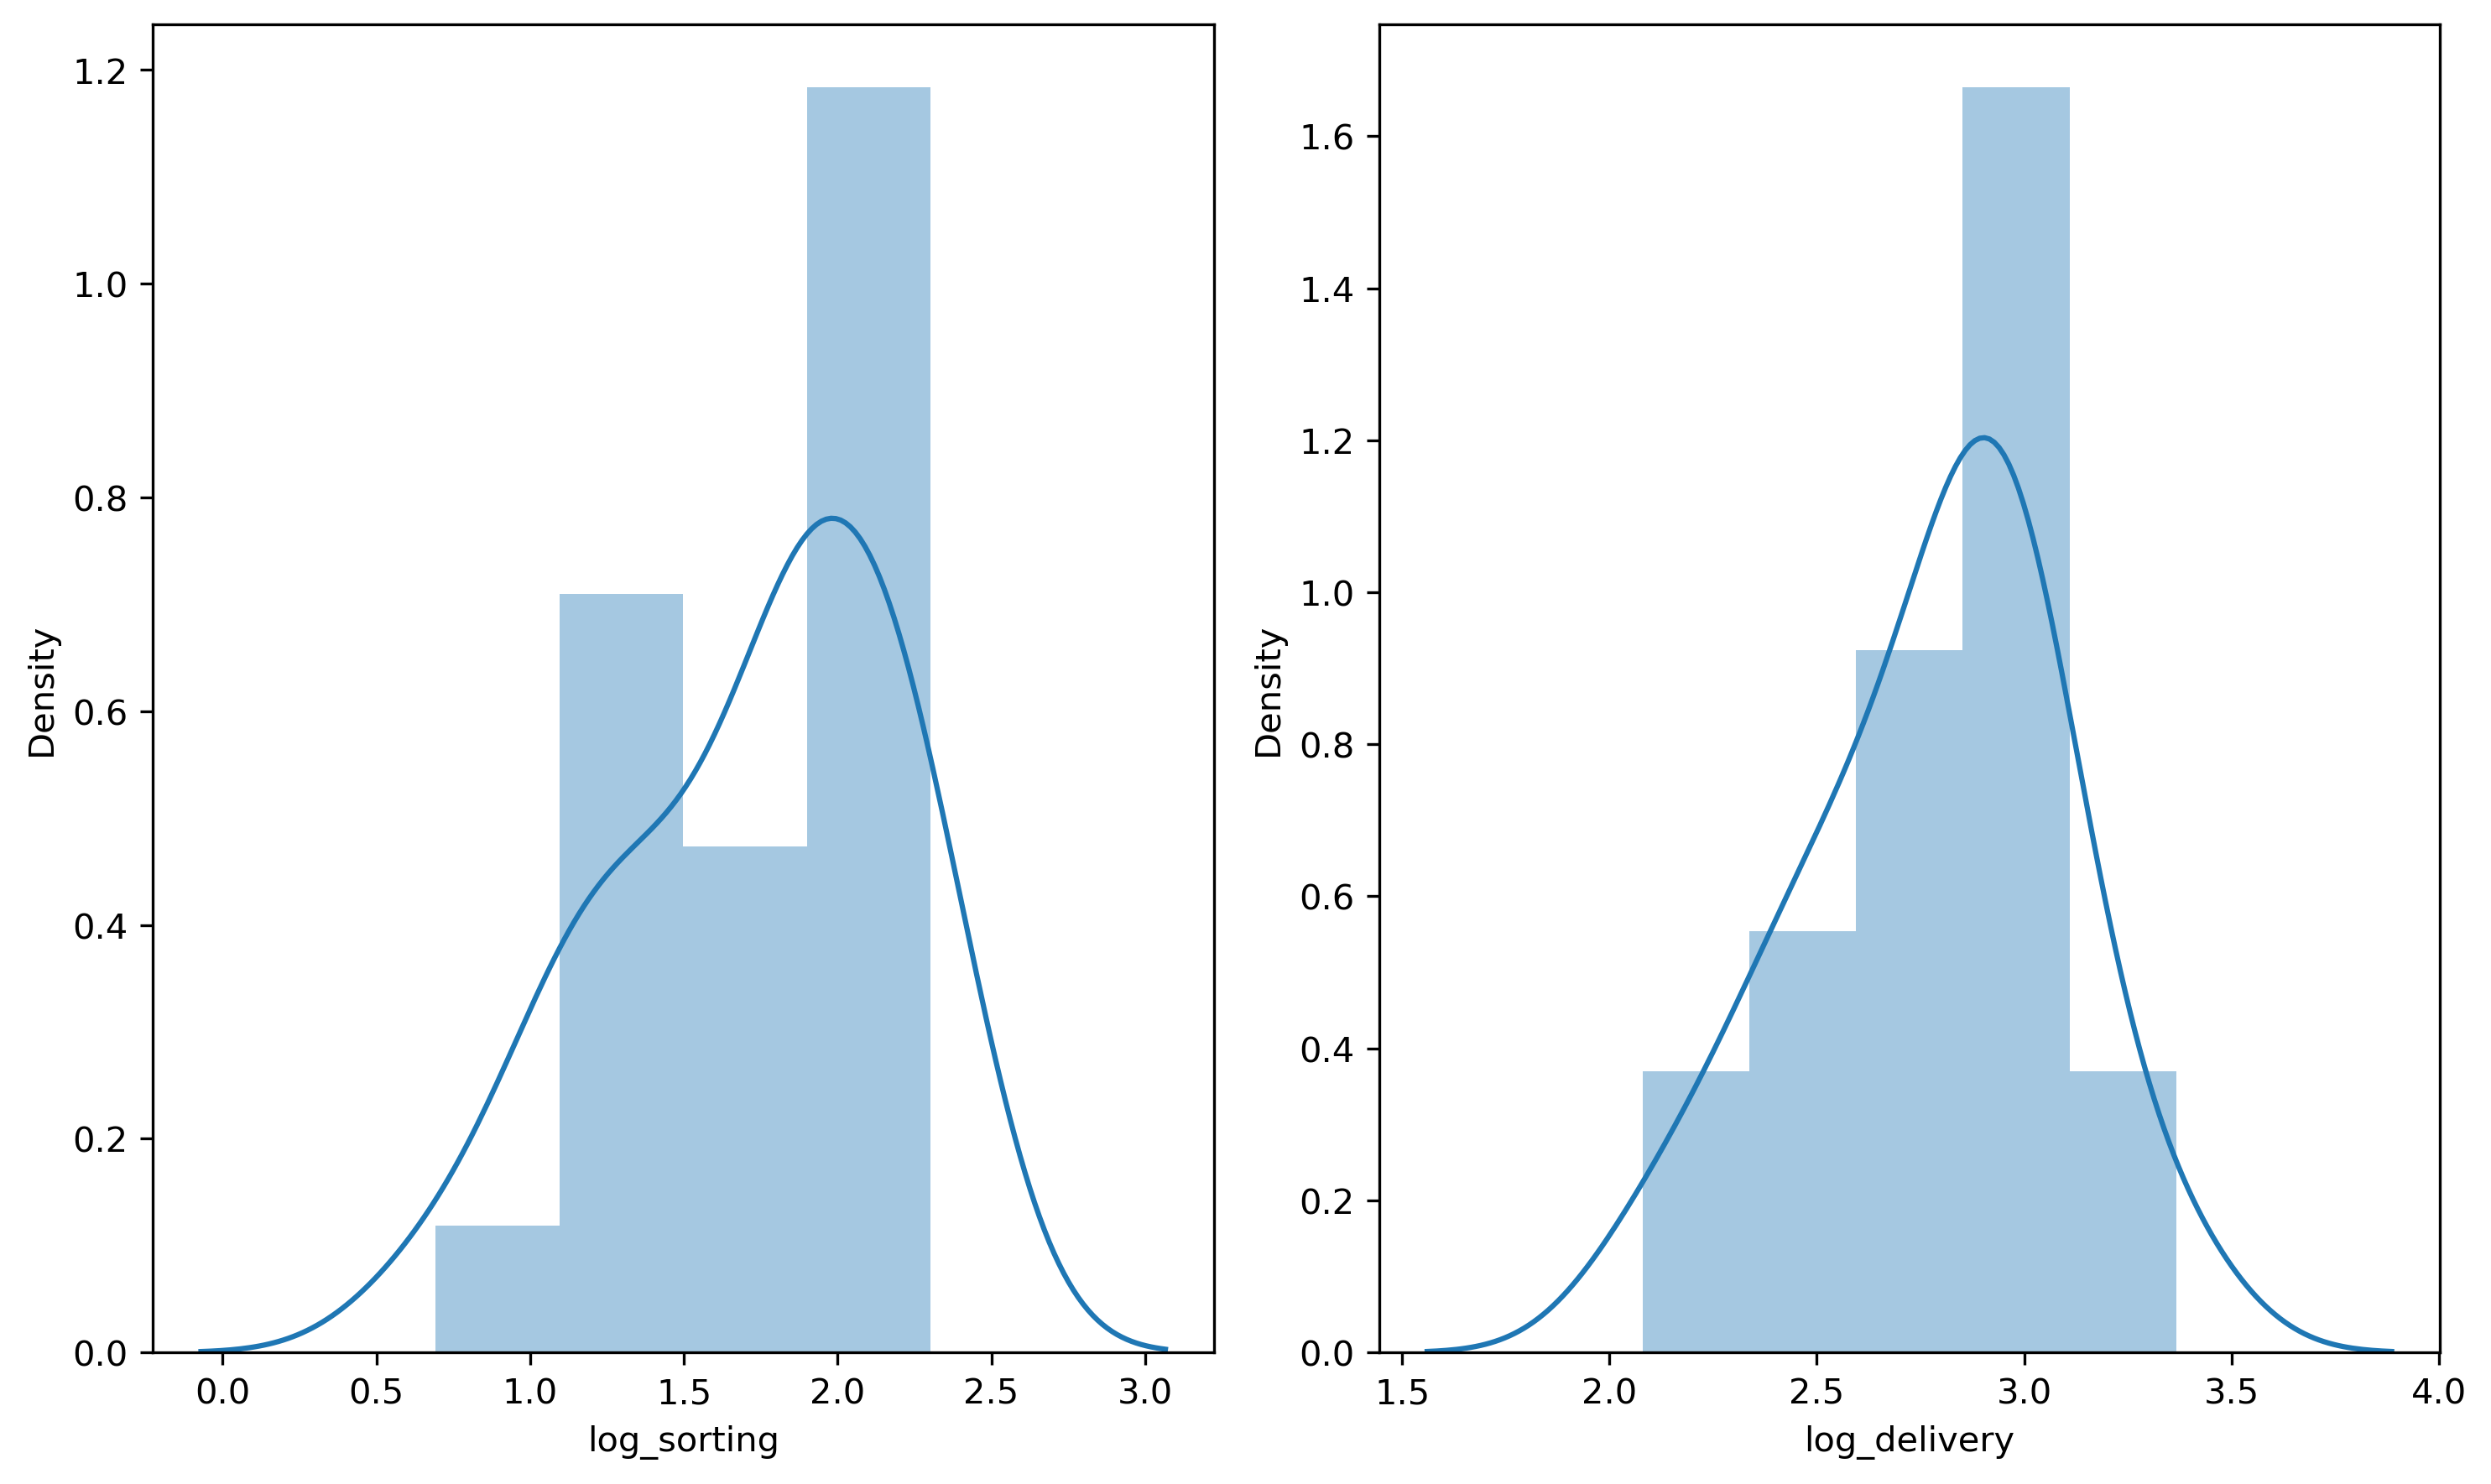

In [52]:
plt.subplot(1,2,1)
sns.distplot(df['log_sorting'])

plt.subplot(1,2,2)
sns.distplot(df['log_delivery'])
plt.tight_layout()

In [54]:
print(df['log_sorting'].skew() , df['log_delivery'].skew())

-0.6052357185134765 -0.4512901148522999


# Square Root Transformation

In [56]:
df['sqrt_sorting']= np.sqrt(df['Sorting'])
df['sqrt_delivery']= np.sqrt(df['Delivery'])
df.head()

,Delivery,Sorting,log_sorting,log_delivery,sqrt_sorting,sqrt_delivery
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165


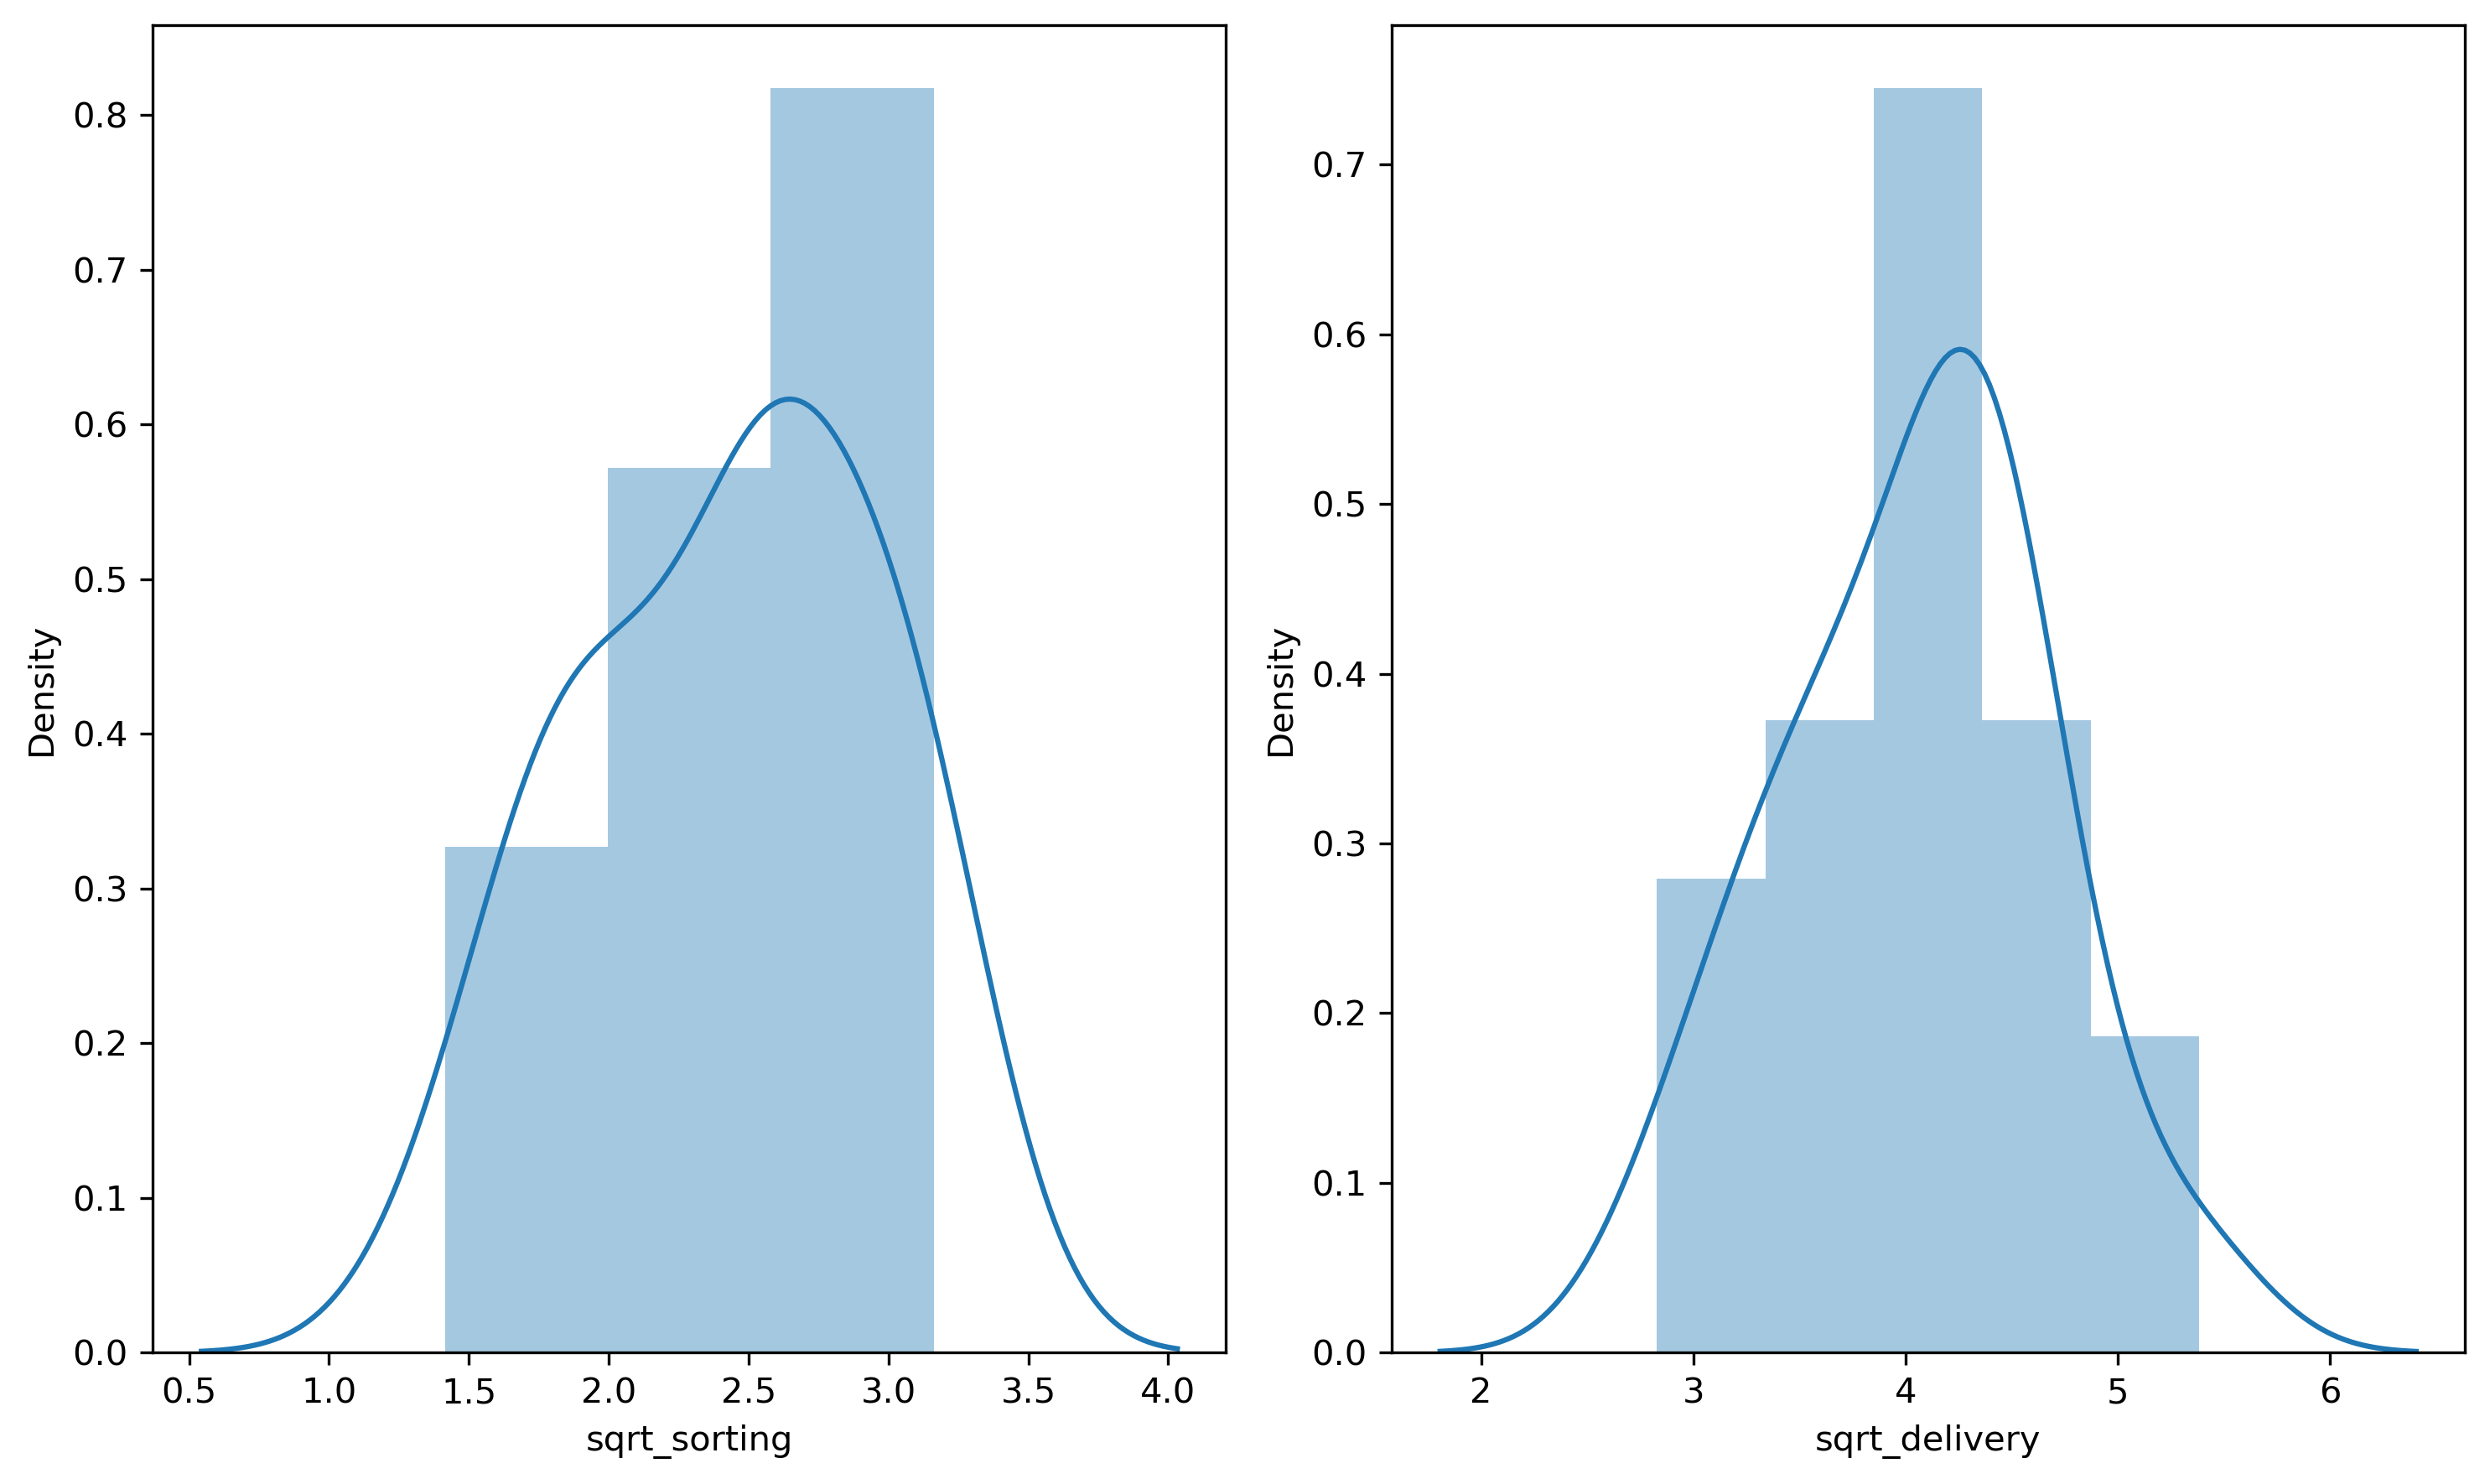

In [58]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_delivery'])
plt.tight_layout()

In [59]:
print(df['sqrt_sorting'].skew() , df['sqrt_delivery'].skew())

-0.25981634723613994 -0.0618105135865213


# Square Transformation

In [60]:
df['sq_sorting']= np.sqrt(df['Sorting'])
df['sq_delivery']= np.sqrt(df['Delivery'])
df.head()

,Delivery,Sorting,log_sorting,log_delivery,sqrt_sorting,sqrt_delivery,sq_sorting,sq_delivery
0,21.00,10,2.302585,3.044522,3.162278,4.582576,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165,3.162278,5.385165


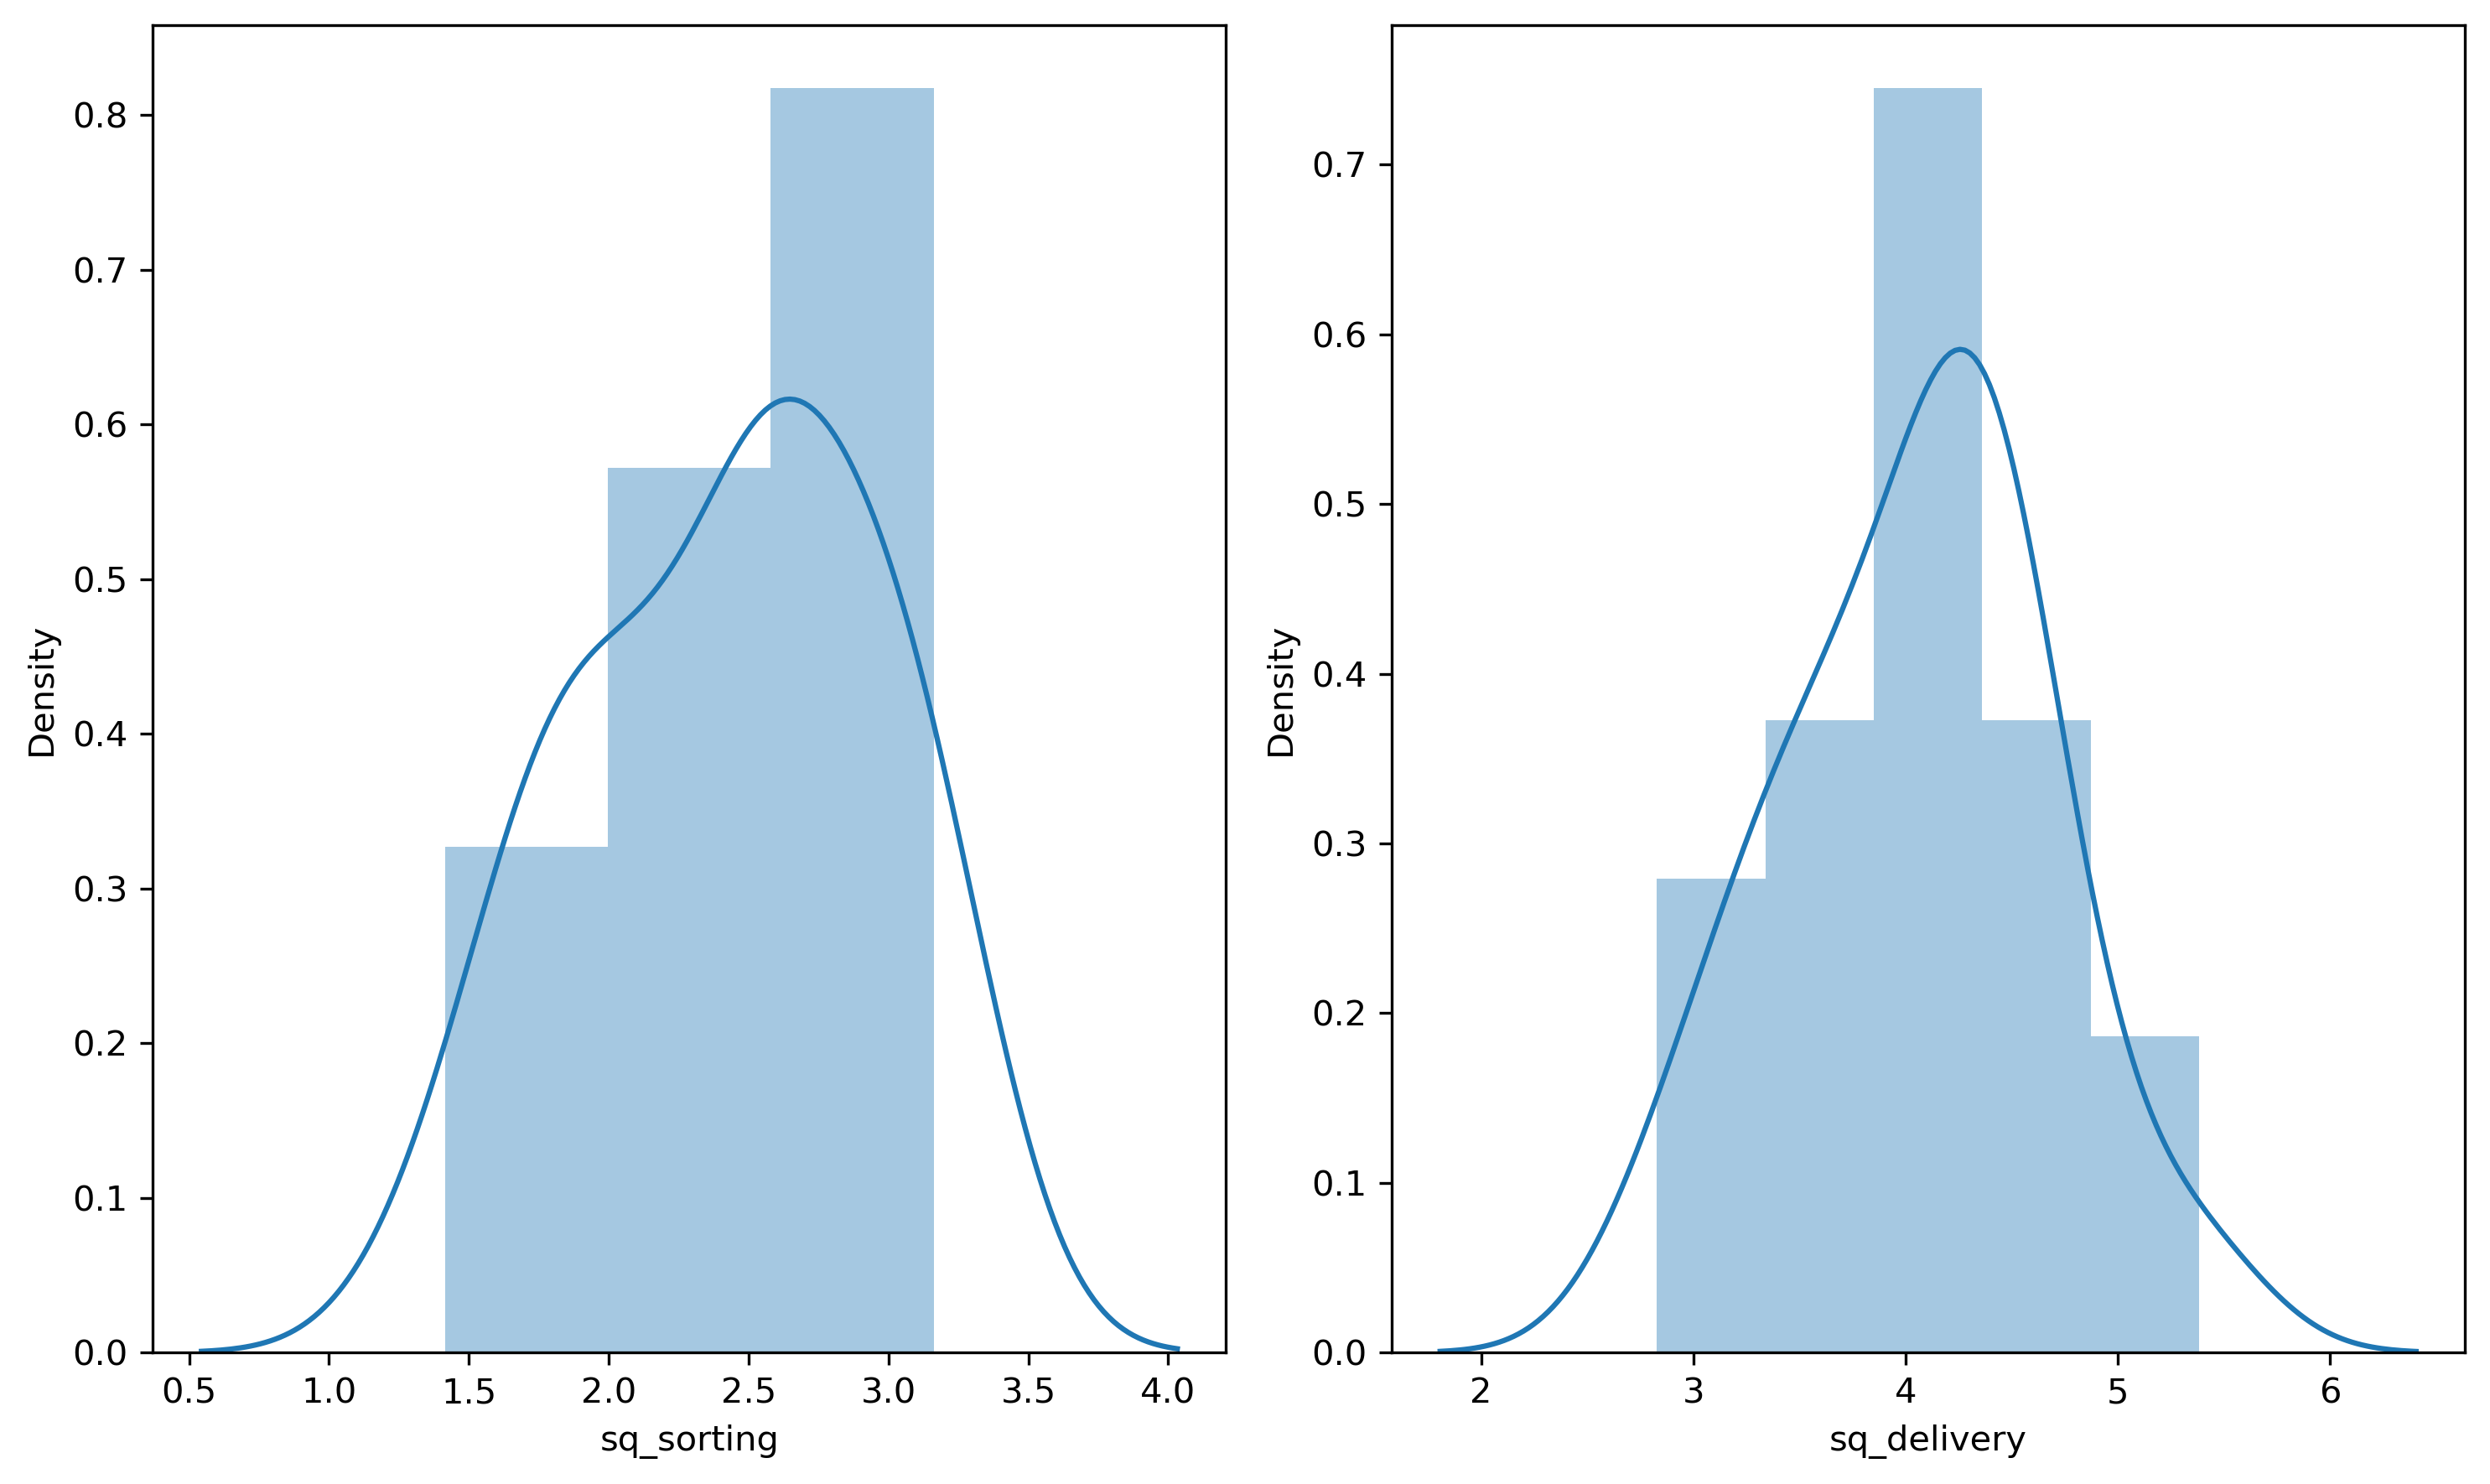

In [63]:
plt.subplot(1,2,1)
sns.distplot(df['sq_sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sq_delivery'])
plt.tight_layout()

In [64]:
print(df['sq_sorting'].skew() , df['sq_delivery'].skew())

-0.25981634723613994 -0.0618105135865213
